<a href="https://colab.research.google.com/github/HakujouRyu/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/CR_Sprint_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 0 - Revert your version of Pandas right from the start
I don't want any of you to get stuck because of Pandas bugs, so right from the get-go revert back to version `0.23.4`
- Run the cell below
- Then restart your runtime. Go to `Runtime`  ->  `Restart runtime...` in the top menu (or click the "RESTART RUNTIME" button that shows up in the output of the cell below).


In [0]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 4.7MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
#Importing!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data')

In [0]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [0]:
#Looks like first row is not headers. We can fix that.
heads = ['age', 'op_year', 'nodes', 'survived_5yrs']
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', names=heads)
df.head()

,age,op_year,nodes,survived_5yrs
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
#Better. NaN?
df.isnull().sum()

age              0
op_year          0
nodes            0
survived_5yrs    0
dtype: int64

In [0]:
#Let's double check for special cases, even though UCI desc agrees.
df


,age,op_year,nodes,survived_5yrs
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [0]:
#Ok, cool.
#Now lets change survived_5yrs to 0 and 1
df['survived_5yrs'] = [x if x is 1 else 0 for x in df['survived_5yrs']]

In [0]:
df.head(20)

,age,op_year,nodes,survived_5yrs
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
#What correltions do we have?
df.corr()

,age,op_year,nodes,survived_5yrs
age,1.000000,0.089529,-0.063176,-0.067950
op_year,0.089529,1.000000,-0.003764,0.004768
nodes,-0.063176,-0.003764,1.000000,-0.286768
survived_5yrs,-0.067950,0.004768,-0.286768,1.000000


In [0]:
#So nodes and survival seem to be the most strongly correlated Lets explore that first.
pd.crosstab(df.survived_5yrs, df.nodes)

nodes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,30,35,46,52
survived_5yrs,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,19,8,5,7,3,4,3,2,2,4,1,3,1,4,1,2,0,1,0,2,1,1,1,3,1,0,0,0,1,0,1
1,117,33,15,13,10,2,4,5,5,2,2,1,1,1,3,1,1,0,1,1,1,0,2,0,0,1,1,1,0,1,0


In [0]:
#oops Lets bin first
nodeBin = pd.cut(df.nodes, 10)
node_v_Survive = pd.crosstab(df.survived_5yrs, nodeBin, normalize='columns')
node_v_Survive

nodes,"(-0.052, 5.2]","(5.2, 10.4]","(10.4, 15.6]","(15.6, 20.8]","(20.8, 26.0]","(26.0, 31.2]","(31.2, 36.4]","(41.6, 46.8]","(46.8, 52.0]"
survived_5yrs,,,,,,,,,
0,0.194915,0.4,0.611111,0.5,0.666667,0.0,1.0,0.0,1.0
1,0.805085,0.6,0.388889,0.5,0.333333,1.0,0.0,1.0,0.0


In [0]:
#That's pretty strong but we should check for confounding variables.
df.age.unique()

array([30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 83])

In [0]:
#Let's use qcut to evenly distribute values
ageBin =  pd.qcut(df.age, 5)
ageBin.value_counts()

(49.0, 55.0]      66
(42.0, 49.0]      62
(29.999, 42.0]    62
(62.0, 83.0]      61
(55.0, 62.0]      55
Name: age, dtype: int64

In [0]:
#Pretty close
age_v_survive = pd.crosstab(df.survived_5yrs, ageBin, normalize='columns')
age_v_survive

age,"(29.999, 42.0]","(42.0, 49.0]","(49.0, 55.0]","(55.0, 62.0]","(62.0, 83.0]"
survived_5yrs,,,,,
0,0.145161,0.354839,0.30303,0.254545,0.262295
1,0.854839,0.645161,0.69697,0.745455,0.737705


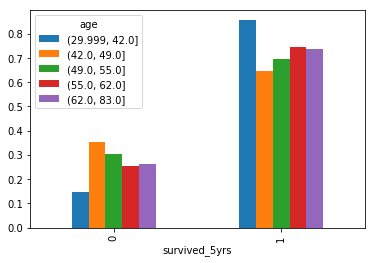

In [0]:
#Hmm. not as correlated Lets do some graphs for now
age_v_survive.plot(kind='bar')

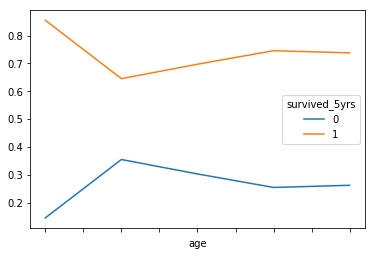

In [0]:
#Lets look at it sideways
age_v_survive.T.plot()

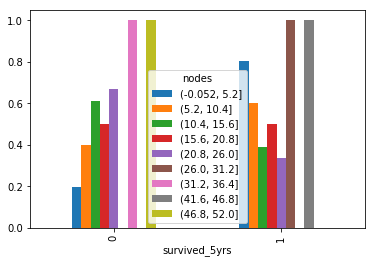

In [0]:
node_v_Survive.plot(kind='bar')

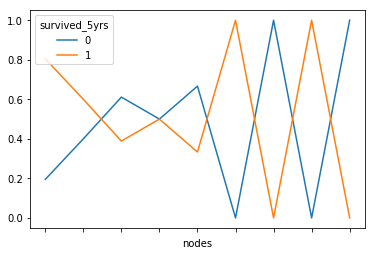

In [0]:
node_v_Survive.T.plot()

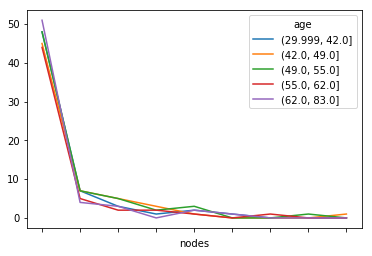

In [0]:
node_v_age = pd.crosstab(nodeBin, ageBin)
node_v_age.plot()

In [0]:
#Lets look at year.
yrs = pd.cut(df.op_year, 12)
yrs.value_counts()

(57.989, 58.917]    36
(63.5, 64.417]      31
(62.583, 63.5]      30
(65.333, 66.25]     28
(64.417, 65.333]    28
(59.833, 60.75]     28
(58.917, 59.833]    27
(60.75, 61.667]     26
(66.25, 67.167]     25
(61.667, 62.583]    23
(67.167, 68.083]    13
(68.083, 69.0]      11
Name: op_year, dtype: int64

In [0]:
yrs_v_survive = pd.crosstab(yrs, df.survived_5yrs, normalize='index')
yrs_v_survive

survived_5yrs,0,1
op_year,,
"(57.989, 58.917]",0.333333,0.666667
"(58.917, 59.833]",0.333333,0.666667
"(59.833, 60.75]",0.142857,0.857143
"(60.75, 61.667]",0.115385,0.884615
"(61.667, 62.583]",0.304348,0.695652
"(62.583, 63.5]",0.266667,0.733333
"(63.5, 64.417]",0.258065,0.741935
"(64.417, 65.333]",0.464286,0.535714
"(65.333, 66.25]",0.214286,0.785714


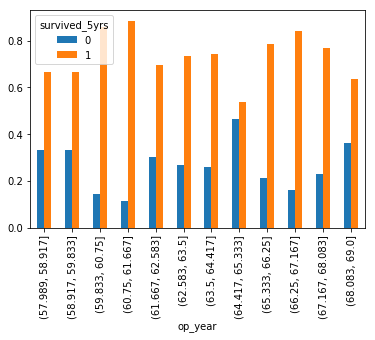

In [0]:
yrs_v_survive.plot(kind='bar')

## Part 3 - DataFrame Filtering

Use DataFrame filtering to subset the data into two smaller dataframes. You should make one dataframe for individuals who survived >5 years and a second dataframe for individuals who did not. 

Create a graph with each of the dataframes (can be the same graph type) to show the differences in Age and Number of Positive Axillary Nodes Detected between the two groups.

In [0]:
survived_df = df[df['survived_5yrs'].astype(bool)]

In [0]:
died_df = df[~df['survived_5yrs'].astype(bool)]

In [0]:
survived_df.head()

,age,op_year,nodes,survived_5yrs
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
died_df.head()

,age,op_year,nodes,survived_5yrs
7,34,59,0,0
8,34,66,9,0
24,38,69,21,0
34,39,66,0,0
43,41,60,23,0


In [0]:
survived_df.mean()

age              52.017778
op_year          62.862222
nodes             2.791111
survived_5yrs     1.000000
dtype: float64

In [0]:
died_df.mean()

age              53.679012
op_year          62.827160
nodes             7.456790
survived_5yrs     0.000000
dtype: float64

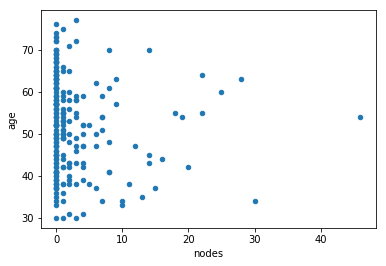

In [0]:
survived_df.plot.scatter('nodes', 'age')

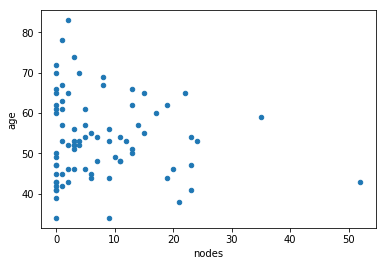

In [0]:
died_df.plot.scatter('nodes', 'age')

## Part 4 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)
- What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

* The only feature to have a positive relationship with survival seems to be operation year.
* Both Nodes and age seem to be negatively related to survival.
*  Age and op_year  seem to have a positive relationship. This could be that the process did improve over the years, that age expectancy in general went up, and/or that the confidence of dr/patient went up over time.



In [0]:
df.corr()

,age,op_year,nodes,survived_5yrs
age,1.000000,0.089529,-0.063176,-0.067950
op_year,0.089529,1.000000,-0.003764,0.004768
nodes,-0.063176,-0.003764,1.000000,-0.286768
survived_5yrs,-0.067950,0.004768,-0.286768,1.000000


In [0]:
survived_df.mean()

age              52.017778
op_year          62.862222
nodes             2.791111
survived_5yrs     1.000000
dtype: float64

In [0]:
died_df.mean()

age              53.679012
op_year          62.827160
nodes             7.456790
survived_5yrs     0.000000
dtype: float64

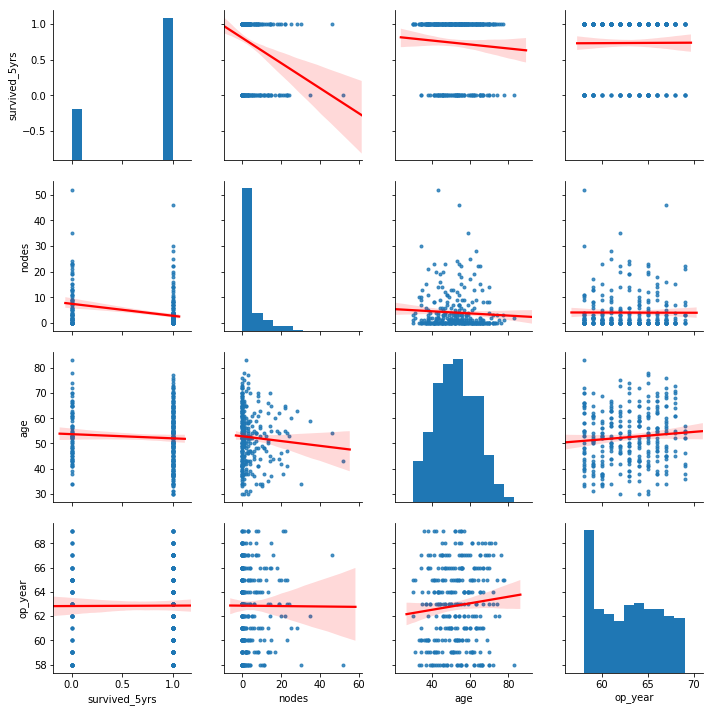

In [0]:
sns.pairplot(df[['survived_5yrs', 'nodes', 'age', 'op_year']], markers='.', kind='reg', plot_kws={'line_kws':{'color':'red'}})